In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# WITH SENTIMENT

In [2]:
df = pd.read_excel("kombinasi-parameter.xlsx")
df

,Unnamed: 0,experiment,mse_train,mse_test
0,0,n_lstm=1_neurons=50_epochs=10,0.012566,0.129100
1,1,n_lstm=1_neurons=50_epochs=20,0.012459,0.148036
2,2,n_lstm=1_neurons=50_epochs=30,0.012382,0.150769
3,3,n_lstm=1_neurons=100_epochs=10,0.012772,0.125439
4,4,n_lstm=1_neurons=100_epochs=20,0.012396,0.142694
5,5,n_lstm=1_neurons=100_epochs=30,0.012915,0.135665
6,6,n_lstm=1_neurons=150_epochs=10,0.012627,0.130294
7,7,n_lstm=1_neurons=150_epochs=20,0.012513,0.144997
8,8,n_lstm=1_neurons=150_epochs=30,0.013052,0.134916
9,9,n_lstm=1_neurons=200_epochs=10,0.012567,0.122616


In [3]:
exp = df["experiment"]

n_lstm = df["experiment"].str.extract(r"n_lstm=(\d+)").astype(int)
neurons = df["experiment"].str.extract(r"neurons=(\d+)").astype(int)
epochs = df["experiment"].str.extract(r"epochs=(\d+)").astype(int)
mse_train = df["mse_train"]
mse_test = df["mse_test"]

In [4]:
train_dict = {
    "n_lstm": n_lstm[0].tolist(),
    "neurons": neurons[0].tolist(),
    "epochs": epochs[0].tolist(),
    "mse_train": mse_train.tolist(),
    "mse_test": mse_test.tolist(),
}

In [5]:
max_mse_train_index = df['mse_train'].idxmin()
max_mse_train_row = df.loc[max_mse_train_index]
print(max_mse_train_row)

Unnamed: 0                               13
experiment    n_lstm=2_neurons=50_epochs=20
mse_train                          0.000312
mse_test                           0.001483
Name: 13, dtype: object


In [6]:
max_mse_test_index = df['mse_test'].idxmin()
max_mse_test_row = df.loc[max_mse_test_index]
print(max_mse_test_row)

Unnamed: 0                                17
experiment    n_lstm=2_neurons=100_epochs=30
mse_train                           0.000328
mse_test                            0.001045
Name: 17, dtype: object


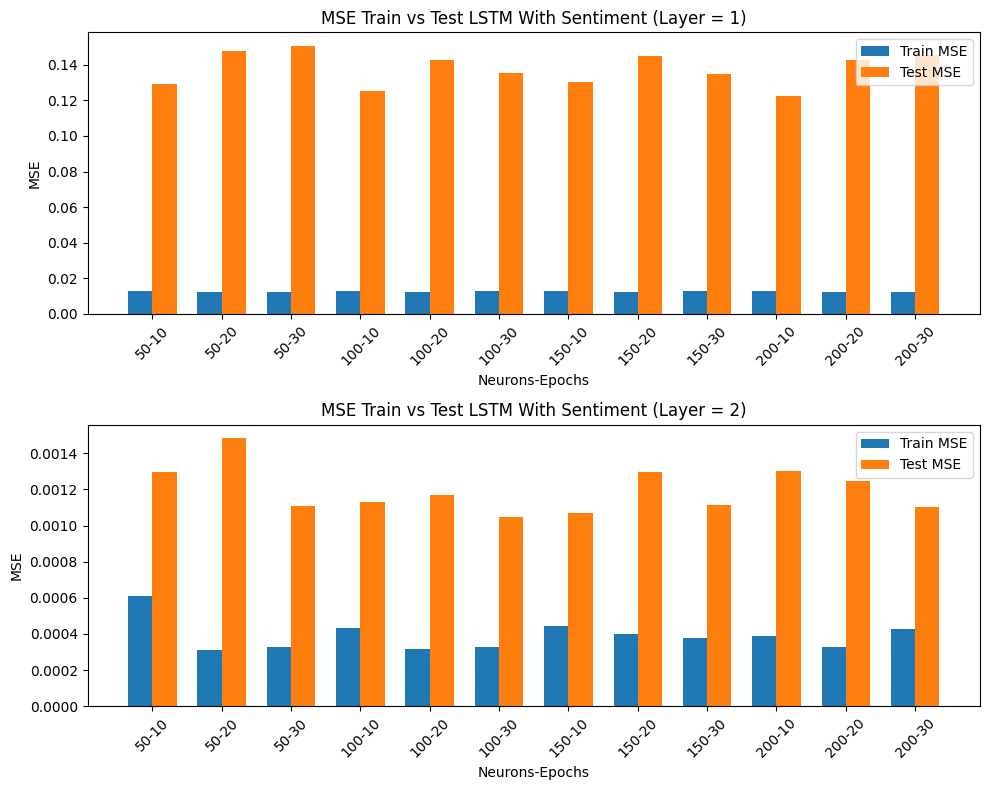

In [7]:
# Filter train_dict for 1 and 2 layers
layer_1_indices = [i for i, x in enumerate(train_dict['n_lstm']) if x == 1]
layer_2_indices = [i for i, x in enumerate(train_dict['n_lstm']) if x == 2]

layer_1_train_dict = {
    'neurons': [train_dict['neurons'][i] for i in layer_1_indices],
    'epochs': [train_dict['epochs'][i] for i in layer_1_indices],
    'mse_train': [train_dict['mse_train'][i] for i in layer_1_indices],
    'mse_test': [train_dict['mse_test'][i] for i in layer_1_indices]
}

layer_2_train_dict = {
    'neurons': [train_dict['neurons'][i] for i in layer_2_indices],
    'epochs': [train_dict['epochs'][i] for i in layer_2_indices],
    'mse_train': [train_dict['mse_train'][i] for i in layer_2_indices],
    'mse_test': [train_dict['mse_test'][i] for i in layer_2_indices]
}

# Plot bar charts
fig, axes = plt.subplots(2, 1, figsize=(10, 8), sharex=False)

# Layer 1
x = np.arange(len(layer_1_train_dict['neurons']))
width = 0.35
axes[0].bar(x - width/2, layer_1_train_dict['mse_train'], width, label='Train MSE')
axes[0].bar(x + width/2, layer_1_train_dict['mse_test'], width, label='Test MSE')
axes[0].set_title('MSE Train vs Test LSTM With Sentiment (Layer = 1)')
axes[0].set_ylabel('MSE')
axes[0].set_xticks(x)
axes[0].set_xticklabels([f'{n}-{e}' for n, e in zip(layer_1_train_dict['neurons'], layer_1_train_dict['epochs'])], rotation=45)
axes[0].set_xlabel('Neurons-Epochs')
axes[0].legend(loc='upper right', frameon=True)

# Layer 2
x = np.arange(len(layer_2_train_dict['neurons']))
axes[1].bar(x - width/2, layer_2_train_dict['mse_train'], width, label='Train MSE')
axes[1].bar(x + width/2, layer_2_train_dict['mse_test'], width, label='Test MSE')
axes[1].set_title('MSE Train vs Test LSTM With Sentiment (Layer = 2)')
axes[1].set_ylabel('MSE')
axes[1].set_xticks(x)
axes[1].set_xticklabels([f'{n}-{e}' for n, e in zip(layer_2_train_dict['neurons'], layer_2_train_dict['epochs'])], rotation=45)
axes[1].set_xlabel('Neurons-Epochs')
axes[1].legend(loc='upper right', frameon=True) 

plt.tight_layout()
plt.show()


# WITHOUT SENTIMENT

In [8]:
df = pd.read_excel("kombinasi-parameter-2.xlsx")
df

,Unnamed: 0,experiment,mse_train,mse_test
0,0,n_lstm=1_neurons=50_epochs=10,0.012487,0.123540
1,1,n_lstm=1_neurons=50_epochs=20,0.012361,0.142664
2,2,n_lstm=1_neurons=50_epochs=30,0.012301,0.138222
3,3,n_lstm=1_neurons=100_epochs=10,0.012571,0.119006
4,4,n_lstm=1_neurons=100_epochs=20,0.012280,0.118235
5,5,n_lstm=1_neurons=100_epochs=30,0.012567,0.133446
6,6,n_lstm=1_neurons=150_epochs=10,0.012514,0.118575
7,7,n_lstm=1_neurons=150_epochs=20,0.012459,0.142251
8,8,n_lstm=1_neurons=150_epochs=30,0.012428,0.140261
9,9,n_lstm=1_neurons=200_epochs=10,0.012565,0.120411


In [9]:
exp = df["experiment"]

n_lstm = df["experiment"].str.extract(r"n_lstm=(\d+)").astype(int)
neurons = df["experiment"].str.extract(r"neurons=(\d+)").astype(int)
epochs = df["experiment"].str.extract(r"epochs=(\d+)").astype(int)
mse_train = df["mse_train"]
mse_test = df["mse_test"]

In [10]:
train_dict = {
    "n_lstm": n_lstm[0].tolist(),
    "neurons": neurons[0].tolist(),
    "epochs": epochs[0].tolist(),
    "mse_train": mse_train.tolist(),
    "mse_test": mse_test.tolist(),
}

In [11]:
max_mse_train_index = df['mse_train'].idxmin()
max_mse_train_row = df.loc[max_mse_train_index]
print(max_mse_train_row)

Unnamed: 0                                20
experiment    n_lstm=2_neurons=150_epochs=30
mse_train                           0.000329
mse_test                            0.001125
Name: 20, dtype: object


In [12]:
max_mse_test_index = df['mse_test'].idxmin()
max_mse_test_row = df.loc[max_mse_test_index]
print(max_mse_test_row)

Unnamed: 0                                17
experiment    n_lstm=2_neurons=100_epochs=30
mse_train                           0.000362
mse_test                            0.001117
Name: 17, dtype: object


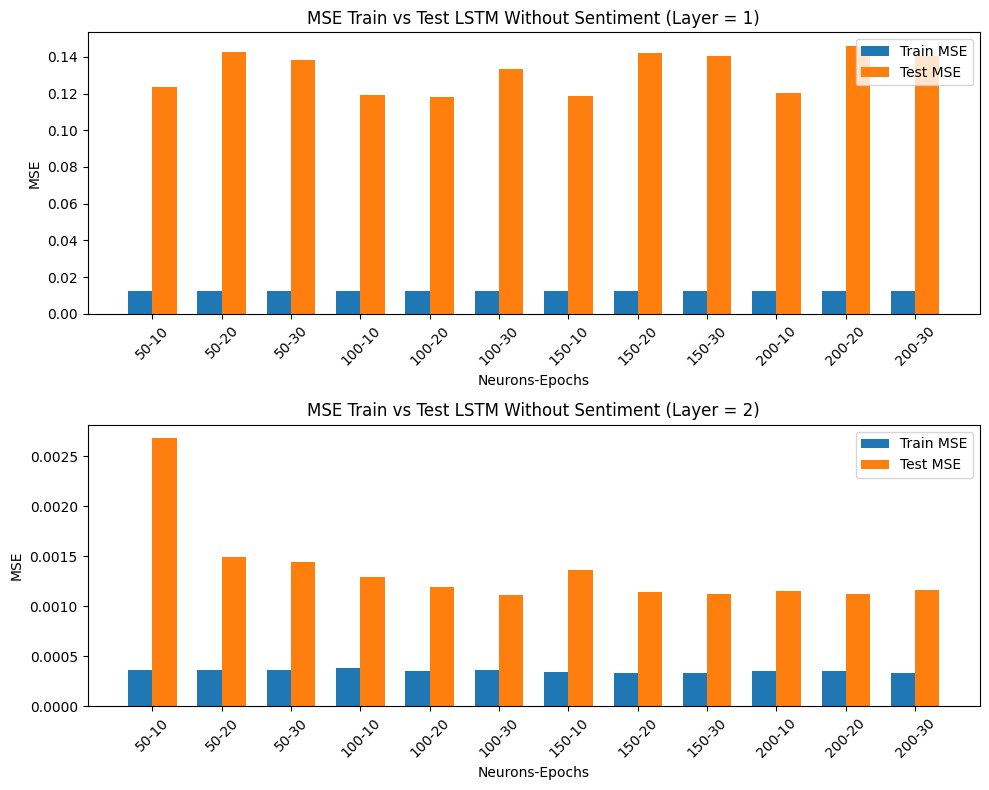

In [13]:
# Filter train_dict for 1 and 2 layers
layer_1_indices = [i for i, x in enumerate(train_dict['n_lstm']) if x == 1]
layer_2_indices = [i for i, x in enumerate(train_dict['n_lstm']) if x == 2]

layer_1_train_dict = {
    'neurons': [train_dict['neurons'][i] for i in layer_1_indices],
    'epochs': [train_dict['epochs'][i] for i in layer_1_indices],
    'mse_train': [train_dict['mse_train'][i] for i in layer_1_indices],
    'mse_test': [train_dict['mse_test'][i] for i in layer_1_indices]
}

layer_2_train_dict = {
    'neurons': [train_dict['neurons'][i] for i in layer_2_indices],
    'epochs': [train_dict['epochs'][i] for i in layer_2_indices],
    'mse_train': [train_dict['mse_train'][i] for i in layer_2_indices],
    'mse_test': [train_dict['mse_test'][i] for i in layer_2_indices]
}

# Plot bar charts
fig, axes = plt.subplots(2, 1, figsize=(10, 8), sharex=False)

# Layer 1
x = np.arange(len(layer_1_train_dict['neurons']))
width = 0.35
axes[0].bar(x - width/2, layer_1_train_dict['mse_train'], width, label='Train MSE')
axes[0].bar(x + width/2, layer_1_train_dict['mse_test'], width, label='Test MSE')
axes[0].set_title('MSE Train vs Test LSTM Without Sentiment (Layer = 1)')
axes[0].set_ylabel('MSE')
axes[0].set_xticks(x)
axes[0].set_xticklabels([f'{n}-{e}' for n, e in zip(layer_1_train_dict['neurons'], layer_1_train_dict['epochs'])], rotation=45)
axes[0].set_xlabel('Neurons-Epochs')
axes[0].legend(loc='upper right', frameon=True) 

# Layer 2
x = np.arange(len(layer_2_train_dict['neurons']))
axes[1].bar(x - width/2, layer_2_train_dict['mse_train'], width, label='Train MSE')
axes[1].bar(x + width/2, layer_2_train_dict['mse_test'], width, label='Test MSE')
axes[1].set_title('MSE Train vs Test LSTM Without Sentiment (Layer = 2)')
axes[1].set_ylabel('MSE')
axes[1].set_xticks(x)
axes[1].set_xticklabels([f'{n}-{e}' for n, e in zip(layer_2_train_dict['neurons'], layer_2_train_dict['epochs'])], rotation=45)
axes[1].set_xlabel('Neurons-Epochs')
axes[1].legend(loc='upper right', frameon=True)

plt.tight_layout()
plt.show()